# **Sentimen Ulasan Pengguna Playstore Pada Aplikasi Identitas Kependudukan Digital (IKD)**
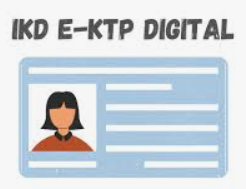


**PROJEK INTERSHIP ( MAGANG )**

*Dinas Kependudukan dan Pencatatan Sipil Kota Pekanbaru*

Apa itu Aplikasi IKD?

IKD adalah singkatan dari Identitas Kependudukan Digital. Ini adalah bentuk digital dari Kartu Tenda Penduduk elektronik (e-KTP) yang dapat diakses melalui smartphone. Dengan kata lain, IKD adalah KTP elektronik versi digital yang disimpan dalam perangkat seluler Anda.

Fungsi IKD:

*   Memudahkan Akses Identitas: Anda tidak perlu lagi membawa fisik e-KTP kemana-mana. Cukup gunakan smartphone Anda untuk menunjukkan identitas Anda.
*   Meningkatkan Efisiensi: Banyak layanan publik dan swasta kini menerima IKD sebagai bukti identitas, sehingga proses verifikasi menjadi lebih cepat dan mudah.
*   Integrasi dengan Layanan Digital: IKD dapat diintegrasikan dengan berbagai layanan digital lainnya, seperti layanan perbankan, pemesanan tiket, dan lain-lain.
*   Meningkatkan Keamanan: IKD dilengkapi dengan fitur keamanan yang kuat untuk melindungi data pribadi Anda.
*   Mendukung Transformasi Digital: IKD merupakan bagian dari upaya pemerintah untuk mendorong transformasi digital di berbagai sektor.

Manfaat Menggunakan IKD:


*   Praktis: Tidak perlu lagi membawa fisik e-KTP.
*   Efisien: Proses verifikasi identitas menjadi lebih cepat.
*   Aman: Data pribadi terlindungi dengan baik.
*   Mendukung pemerintah dalam transformasi digital.

Berdasarkan banyaknya manfaat dan fungsi yang diberikan aplikasi, tidak terlepas tanggapan dari pengguna mulai dari positif, netral, dan negatif. Penelitian akan melihat ulasan pengguna dengan rating yang diberikan. Analisis menggunakan metode Machine Learning dengan langkah-langkah sebagai berikut.

***STEP 1 Pengumpulan Data ( Scraping Data )***

In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
from itertools import count
from google_play_scraper import Sort, reviews_all
import pandas as pd

# Mengambil semua ulasan
def get_reviews(app_id, max_count=3000, page_size=100):
    reviews = []
    for i in range(0, max_count, page_size):
        new_reviews = reviews_all(
            app_id,
            sleep_milliseconds=1000,
            count=page_size,
        )
        reviews.extend(new_reviews)
        if len(reviews) >= max_count:
            break
    return reviews[:max_count]

app_id = 'gov.dukcapil.mobile_id'
reviews = get_reviews(app_id, max_count=3000)

df = pd.DataFrame(reviews)
df['at'] = pd.to_datetime(df['at'])
df = df[df['at'].dt.year == 2023]

df['month'] = df['at'].dt.month
df = df.sort_values(by='month').reset_index(drop=True)
display(df[['content', 'score', 'at']])


,content,score,at
0,👍🏻👍🏻,5,2023-01-01 04:18:15
1,"Meminimalisir kehilangn ktp fisik, jdi lebih m...",5,2023-01-20 08:00:02
2,"Pake harus ke disdukcapil, ngapain bikin apps ...",1,2023-01-20 08:14:00
3,"aplikasi nya sudah baik, namun sayangnya untuk...",5,2023-01-20 08:42:24
4,Merupakan inovasi pelayanan publik tebaik khus...,5,2023-01-20 09:28:38
...,...,...,...
1601,"Ini sistem sudah online, kenapa harus dateng l...",1,2023-12-11 14:39:34
1602,Bad ux,1,2023-12-12 02:07:20
1603,Harusnya gak perlu datang ke dukcapil lagi unt...,1,2023-12-12 02:46:53
1604,"Gak guna, daftar aja ribet, harus scan wajah d...",1,2023-12-11 00:52:42


In [ ]:
df = df.rename(columns={'content': 'ulasan', 'score': 'rating', 'at': 'waktu'})
df.to_csv('ulasan_2023.csv', index=False)

In [ ]:
display(df[['ulasan', 'rating', 'waktu']])

,ulasan,rating,waktu
0,👍🏻👍🏻,5,2023-01-01 04:18:15
1,"Meminimalisir kehilangn ktp fisik, jdi lebih m...",5,2023-01-20 08:00:02
2,"Pake harus ke disdukcapil, ngapain bikin apps ...",1,2023-01-20 08:14:00
3,"aplikasi nya sudah baik, namun sayangnya untuk...",5,2023-01-20 08:42:24
4,Merupakan inovasi pelayanan publik tebaik khus...,5,2023-01-20 09:28:38
...,...,...,...
1601,"Ini sistem sudah online, kenapa harus dateng l...",1,2023-12-11 14:39:34
1602,Bad ux,1,2023-12-12 02:07:20
1603,Harusnya gak perlu datang ke dukcapil lagi unt...,1,2023-12-12 02:46:53
1604,"Gak guna, daftar aja ribet, harus scan wajah d...",1,2023-12-11 00:52:42


In [ ]:
df[['ulasan', 'rating']].to_csv('k2.csv', index=False)

In [ ]:
k2 = pd.read_csv('k2.csv')
display(k2)

,ulasan,rating
0,👍🏻👍🏻,5
1,"Meminimalisir kehilangn ktp fisik, jdi lebih m...",5
2,"Pake harus ke disdukcapil, ngapain bikin apps ...",1
3,"aplikasi nya sudah baik, namun sayangnya untuk...",5
4,Merupakan inovasi pelayanan publik tebaik khus...,5
...,...,...
1601,"Ini sistem sudah online, kenapa harus dateng l...",1
1602,Bad ux,1
1603,Harusnya gak perlu datang ke dukcapil lagi unt...,1
1604,"Gak guna, daftar aja ribet, harus scan wajah d...",1


In [ ]:
def ganti_singkatan(text, singkatan):

  words = text.split()
  new_words = []
  for word in words:
    new_words.append(singkatan.get(word, word))
  return ' '.join(new_words)

k2_df = pd.read_csv('k2.csv')

singkatan = {"Gak":"Tidak","gak":"tidak","yg": "yang", "Pake": "Pakai","sdh": "sudah", "utk": "untuk", "kehilangn": "kehilangan", "mantab": "mantap", "knp": "kenapa", "tp": "tapi", "jdi": "jadi", "thn": "tahun", "bln": "bulan", "makasih": "terimakasih", "bs": "bisa", "bgs": "bagus", "bgt": "banget", "mnt": "menit", "kmrn": "kemarin", "mkn": "makan", "sj": "saja", "dlm": "dalam", "spt": "seperti", "dr": "dari", "ank": "anak", "sdh": "sudah", "blm": "belum", "sblm": "sebelum", "sgt": "sangat", "dgn": "dengan", "tmn": "teman", "tebaik": "terbaik", "bru": "baru", "sy": "saya", "sya": "saya", "pda": "pada", "pd": "pada", "byk": "banyak", "dateng": "datang", "bnget": "banget", "bngetlah": "bangetlah", "bg": "bang", "pak": "bapak", "bu": "ibu", "gru": "guru", "dri": "dari", "sgt": "sangat", "Sbnarnya": "sebenarnya", "dg": "dengan", "dgn": "dengan", "sblm": "sebelum", "sblmnya": "sebelumnya", "org": "orang", "hrs": "harus", "kmi": "kami", "kmu": "kamu"}

k2_df['ulasan'] = k2_df['ulasan'].apply(ganti_singkatan, args=(singkatan,))
display(k2_df)

,ulasan,rating
0,👍🏻👍🏻,5
1,"Meminimalisir kehilangan ktp fisik, jadi lebih...",5
2,"Pakai harus ke disdukcapil, ngapain bikin apps...",1
3,"aplikasi nya sudah baik, namun sayangnya untuk...",5
4,Merupakan inovasi pelayanan publik terbaik khu...,5
...,...,...
1601,"Ini sistem sudah online, kenapa harus datang l...",1
1602,Bad ux,1
1603,Harusnya tidak perlu datang ke dukcapil lagi u...,1
1604,"Tidak guna, daftar aja ribet, harus scan wajah...",1


***STEP 2 Pelabelan***

In [ ]:
def label_sentiment(rating):
  if rating > 3:
    return 'Positif'
  elif rating < 3:
    return 'Negatif'
  else:
    return 'Netral'

k2_df['sentimen'] = k2_df['rating'].apply(label_sentiment)
display(k2_df)

,ulasan,rating,sentimen
0,👍🏻👍🏻,5,Positif
1,"Meminimalisir kehilangan ktp fisik, jadi lebih...",5,Positif
2,"Pakai harus ke disdukcapil, ngapain bikin apps...",1,Negatif
3,"aplikasi nya sudah baik, namun sayangnya untuk...",5,Positif
4,Merupakan inovasi pelayanan publik terbaik khu...,5,Positif
...,...,...,...
1601,"Ini sistem sudah online, kenapa harus datang l...",1,Negatif
1602,Bad ux,1,Negatif
1603,Harusnya tidak perlu datang ke dukcapil lagi u...,1,Negatif
1604,"Tidak guna, daftar aja ribet, harus scan wajah...",1,Negatif


***STEP 3 PRE-PROCESSING***

In [ ]:
import re

def clean_text(text):
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\d+', '', text)
  text = text.encode('ascii', 'ignore').decode()
  return text

k2_df['ulasan_bersih'] = k2_df['ulasan'].apply(clean_text)

k2_df['ulasan_bersih'] = k2_df['ulasan_bersih'].str.lower()

display(k2_df)

,ulasan,rating,sentimen,ulasan_bersih
0,👍🏻👍🏻,5,Positif,
1,"Meminimalisir kehilangan ktp fisik, jadi lebih...",5,Positif,meminimalisir kehilangan ktp fisik jadi lebih ...
2,"Pakai harus ke disdukcapil, ngapain bikin apps...",1,Negatif,pakai harus ke disdukcapil ngapain bikin apps ...
3,"aplikasi nya sudah baik, namun sayangnya untuk...",5,Positif,aplikasi nya sudah baik namun sayangnya untuk ...
4,Merupakan inovasi pelayanan publik terbaik khu...,5,Positif,merupakan inovasi pelayanan publik terbaik khu...
...,...,...,...,...
1601,"Ini sistem sudah online, kenapa harus datang l...",1,Negatif,ini sistem sudah online kenapa harus datang la...
1602,Bad ux,1,Negatif,bad ux
1603,Harusnya tidak perlu datang ke dukcapil lagi u...,1,Negatif,harusnya tidak perlu datang ke dukcapil lagi u...
1604,"Tidak guna, daftar aja ribet, harus scan wajah...",1,Negatif,tidak guna daftar aja ribet harus scan wajah d...


In [ ]:
k2_df.to_csv('ulasan_bersih.csv', index=False)

In [ ]:
df = pd.read_csv('ulasan_bersih.csv')
display(df)

,ulasan,rating,sentimen,ulasan_bersih
0,👍🏻👍🏻,5,Positif,NaN
1,"Meminimalisir kehilangan ktp fisik, jadi lebih...",5,Positif,meminimalisir kehilangan ktp fisik jadi lebih ...
2,"Pakai harus ke disdukcapil, ngapain bikin apps...",1,Negatif,pakai harus ke disdukcapil ngapain bikin apps ...
3,"aplikasi nya sudah baik, namun sayangnya untuk...",5,Positif,aplikasi nya sudah baik namun sayangnya untuk ...
4,Merupakan inovasi pelayanan publik terbaik khu...,5,Positif,merupakan inovasi pelayanan publik terbaik khu...
...,...,...,...,...
1601,"Ini sistem sudah online, kenapa harus datang l...",1,Negatif,ini sistem sudah online kenapa harus datang la...
1602,Bad ux,1,Negatif,bad ux
1603,Harusnya tidak perlu datang ke dukcapil lagi u...,1,Negatif,harusnya tidak perlu datang ke dukcapil lagi u...
1604,"Tidak guna, daftar aja ribet, harus scan wajah...",1,Negatif,tidak guna daftar aja ribet harus scan wajah d...


In [ ]:
df.dropna(subset=['ulasan'], inplace=True)
df.dropna(subset=['rating'], inplace=True)
df.dropna(subset=['sentimen'], inplace=True)
df.dropna(subset=['ulasan_bersih'], inplace=True)

display(df)

,ulasan,rating,sentimen,ulasan_bersih
1,"Meminimalisir kehilangan ktp fisik, jadi lebih...",5,Positif,meminimalisir kehilangan ktp fisik jadi lebih ...
2,"Pakai harus ke disdukcapil, ngapain bikin apps...",1,Negatif,pakai harus ke disdukcapil ngapain bikin apps ...
3,"aplikasi nya sudah baik, namun sayangnya untuk...",5,Positif,aplikasi nya sudah baik namun sayangnya untuk ...
4,Merupakan inovasi pelayanan publik terbaik khu...,5,Positif,merupakan inovasi pelayanan publik terbaik khu...
5,app👍🏻👍🏻,5,Positif,app
...,...,...,...,...
1601,"Ini sistem sudah online, kenapa harus datang l...",1,Negatif,ini sistem sudah online kenapa harus datang la...
1602,Bad ux,1,Negatif,bad ux
1603,Harusnya tidak perlu datang ke dukcapil lagi u...,1,Negatif,harusnya tidak perlu datang ke dukcapil lagi u...
1604,"Tidak guna, daftar aja ribet, harus scan wajah...",1,Negatif,tidak guna daftar aja ribet harus scan wajah d...


In [ ]:
total_data_bersih = len(df)
print("Jumlah total data bersih:", total_data_bersih)

Jumlah total data bersih: 1596


In [ ]:
df.to_csv('preprocess.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('preprocess.csv')
display(df)

,ulasan,rating,sentimen,ulasan_bersih
0,"Meminimalisir kehilangan ktp fisik, jadi lebih...",5,Positif,meminimalisir kehilangan ktp fisik jadi lebih ...
1,"Pakai harus ke disdukcapil, ngapain bikin apps...",1,Negatif,pakai harus ke disdukcapil ngapain bikin apps ...
2,"aplikasi nya sudah baik, namun sayangnya untuk...",5,Positif,aplikasi nya sudah baik namun sayangnya untuk ...
3,Merupakan inovasi pelayanan publik terbaik khu...,5,Positif,merupakan inovasi pelayanan publik terbaik khu...
4,app👍🏻👍🏻,5,Positif,app
...,...,...,...,...
1591,"Ini sistem sudah online, kenapa harus datang l...",1,Negatif,ini sistem sudah online kenapa harus datang la...
1592,Bad ux,1,Negatif,bad ux
1593,Harusnya tidak perlu datang ke dukcapil lagi u...,1,Negatif,harusnya tidak perlu datang ke dukcapil lagi u...
1594,"Tidak guna, daftar aja ribet, harus scan wajah...",1,Negatif,tidak guna daftar aja ribet harus scan wajah d...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ulasan         1596 non-null   object
 1   rating         1596 non-null   int64 
 2   sentimen       1596 non-null   object
 3   ulasan_bersih  1596 non-null   object
dtypes: int64(1), object(3)
memory usage: 50.0+ KB


In [ ]:
df.isna()

,ulasan,rating,sentimen,ulasan_bersih
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1591,False,False,False,False
1592,False,False,False,False
1593,False,False,False,False
1594,False,False,False,False


***STEP 4 Data Train Dan Test***

In [ ]:
from sklearn.model_selection import train_test_split

X = df['ulasan_bersih']
y = df['sentimen']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 1276
Jumlah data uji: 320


***STEP 5 FITUR EKSTRAKSI TF-IDF***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X = df['ulasan_bersih']
y = df['sentimen']

# Pembagian data dengan mempertahankan proporsi yang seimbang
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan jumlah data pada setiap set
print("Jumlah data pelatihan:")
print(y_train.value_counts())

print("Jumlah data pengujian:")
print(y_test.value_counts())

Jumlah data pelatihan:
sentimen
Negatif    790
Positif    429
Netral      57
Name: count, dtype: int64
Jumlah data pengujian:
sentimen
Negatif    198
Positif    108
Netral      14
Name: count, dtype: int64


In [ ]:
X = df['ulasan_bersih']
y = df['sentimen']

vectorizer = TfidfVectorizer()

X_tfidf = vectorizer.fit_transform(X)

In [ ]:
X = df['ulasan_bersih']
y = df['sentimen']

vectorizer = TfidfVectorizer()

vectorizer.fit(X_train)

X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
X = df['ulasan_bersih']
y = df['sentimen']

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

feature_names = vectorizer.get_feature_names_out()

df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
display(df_tfidf.head())

,__,aah,aamiin,aat,abang,abis,about,accept,access,accommodate,...,you,your,youre,yourself,youtube,youube,yuk,zenfone,zonk,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***STEP 6 Komparasi Algoritma***

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model-model
svm_model = SVC()
rf_model = RandomForestClassifier()
nb_model = MultinomialNB()
knn_model = KNeighborsClassifier()

# Latih model-model menggunakan data pelatihan
svm_model.fit(X_train_tfidf, y_train)
rf_model.fit(X_train_tfidf, y_train)
nb_model.fit(X_train_tfidf, y_train)
knn_model.fit(X_train_tfidf, y_train)

# Prediksi pada data pengujian
y_pred_svm = svm_model.predict(X_test_tfidf)
y_pred_rf = rf_model.predict(X_test_tfidf)
y_pred_nb = nb_model.predict(X_test_tfidf)
y_pred_knn = knn_model.predict(X_test_tfidf)

# Evaluasi akurasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Tampilkan hasil akurasi
print("Akurasi SVM:", accuracy_svm)
print("Akurasi Random Forest:", accuracy_rf)
print("Akurasi Naive Bayes:", accuracy_nb)
print("Akurasi KNN:", accuracy_knn)


Akurasi SVM: 0.840625
Akurasi Random Forest: 0.85
Akurasi Naive Bayes: 0.809375
Akurasi KNN: 0.846875


In [ ]:
from sklearn.metrics import classification_report

print("Laporan Klasifikasi SVM:")
print(classification_report(y_test, y_pred_svm))

print("\nLaporan Klasifikasi Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("\nLaporan Klasifikasi Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

print("\nLaporan Klasifikasi KNN:")
print(classification_report(y_test, y_pred_knn))

Laporan Klasifikasi SVM:
              precision    recall  f1-score   support

     Negatif       0.81      0.98      0.89       198
      Netral       0.00      0.00      0.00        14
     Positif       0.94      0.69      0.80       108

    accuracy                           0.84       320
   macro avg       0.58      0.56      0.56       320
weighted avg       0.82      0.84      0.82       320


Laporan Klasifikasi Random Forest:
              precision    recall  f1-score   support

     Negatif       0.85      0.93      0.89       198
      Netral       0.00      0.00      0.00        14
     Positif       0.85      0.81      0.83       108

    accuracy                           0.85       320
   macro avg       0.57      0.58      0.57       320
weighted avg       0.81      0.85      0.83       320


Laporan Klasifikasi Naive Bayes:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

     Negatif       0.77      0.98      0.87       198
      Netral       0.00      0.00      0.00        14
     Positif       0.94      0.59      0.73       108

    accuracy                           0.81       320
   macro avg       0.57      0.53      0.53       320
weighted avg       0.80      0.81      0.78       320


Laporan Klasifikasi KNN:
              precision    recall  f1-score   support

     Negatif       0.84      0.94      0.89       198
      Netral       0.00      0.00      0.00        14
     Positif       0.88      0.78      0.82       108

    accuracy                           0.85       320
   macro avg       0.57      0.57      0.57       320
weighted avg       0.81      0.85      0.83       320



***STEP 6 Visualisasi***

<Figure size 1200x600 with 0 Axes>

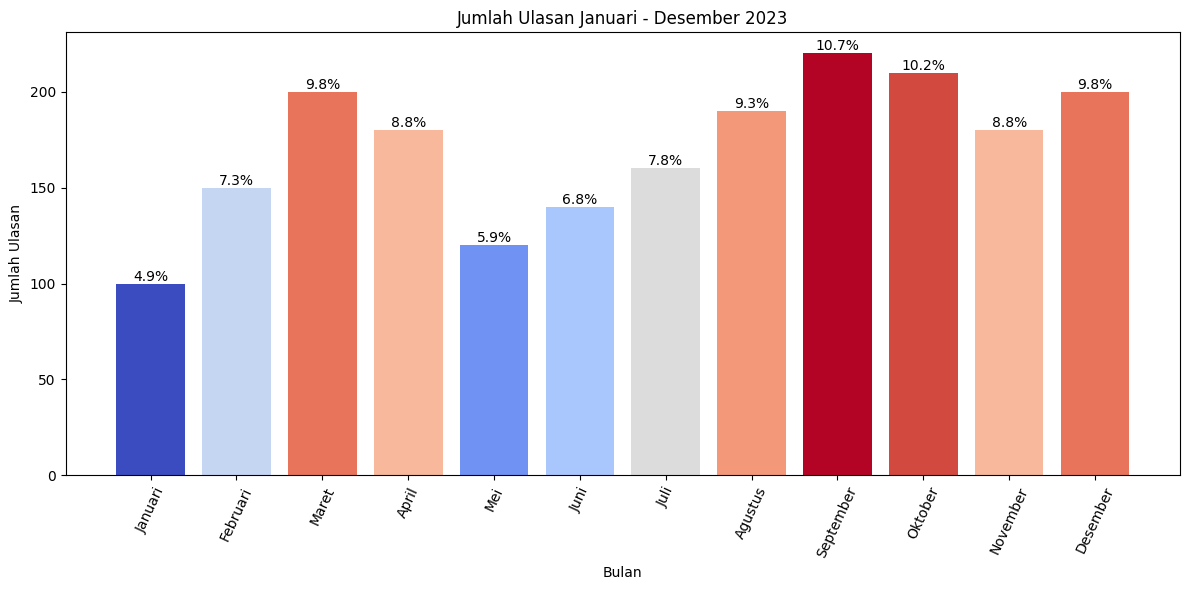

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as mdates
import pandas as pd

df = pd.read_csv('ulasan_2023.csv')

monthly_counts = df['waktu'].value_counts().sort_index()
total_reviews = monthly_counts.sum()

cmap = colors.LinearSegmentedColormap.from_list("", ["red", "blue"])

norm = plt.Normalize(monthly_counts.min(), monthly_counts.max())

bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
monthly_counts = [100, 150, 200, 180, 120, 140, 160, 190, 220, 210, 180, 200]

total_reviews = sum(monthly_counts)

plt.figure(figsize=(12, 6))

cmap = plt.get_cmap('coolwarm')
norm = colors.Normalize(vmin=min(monthly_counts), vmax=max(monthly_counts))

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(bulan, monthly_counts, color=cmap(norm(monthly_counts)))

plt.xlabel('Bulan')
plt.ylabel('Jumlah Ulasan')
plt.title('Jumlah Ulasan Januari - Desember 2023')
plt.xticks(rotation=65)


for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total_reviews)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter
import pandas as pd

df = pd.read_csv('ulasan_2023.csv')
df['waktu'] = pd.to_datetime(df['waktu'])

# Mengelompokkan data berdasarkan bulan dan menghitung rating terbanyak
monthly_ratings = {}
for month in range(1, 13):
  monthly_data = df[df['waktu'].dt.month == month]
  ratings = monthly_data['rating'].tolist()
  most_common_rating = Counter(ratings).most_common(1)[0][0]
  monthly_ratings[month] = most_common_rating

# Menampilkan hasil
for month, rating in monthly_ratings.items():
  print(f"Bulan {month}: Rating terbanyak adalah {rating}")

Bulan 1: Rating terbanyak adalah 5
Bulan 2: Rating terbanyak adalah 1
Bulan 3: Rating terbanyak adalah 5
Bulan 4: Rating terbanyak adalah 1
Bulan 5: Rating terbanyak adalah 1
Bulan 6: Rating terbanyak adalah 5
Bulan 7: Rating terbanyak adalah 1
Bulan 8: Rating terbanyak adalah 1
Bulan 9: Rating terbanyak adalah 1
Bulan 10: Rating terbanyak adalah 1
Bulan 11: Rating terbanyak adalah 1
Bulan 12: Rating terbanyak adalah 1


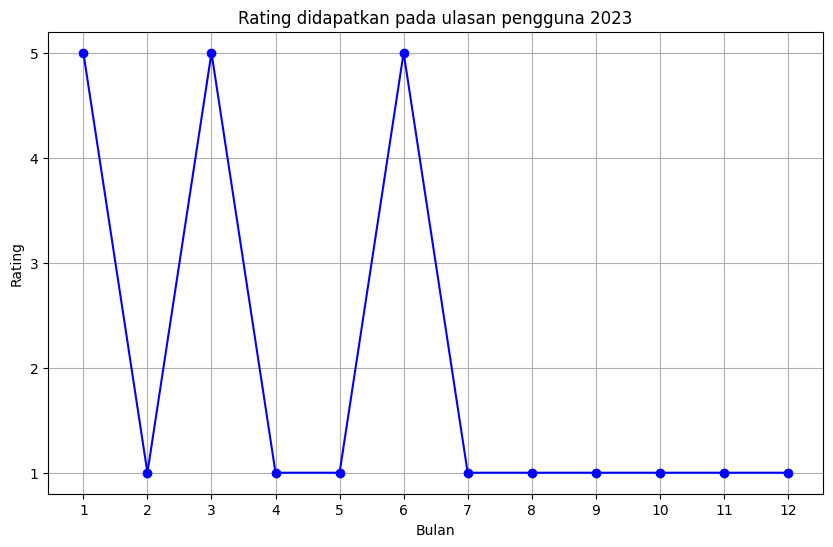

In [ ]:
import matplotlib.pyplot as plt

# Data rating terbanyak per bulan
bulan = list(range(1, 13))
rating_terbanyak = [5, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1]

plt.figure(figsize=(10, 6))
plt.plot(bulan, rating_terbanyak, marker='o', linestyle='-', color='b')
plt.title('Rating didapatkan pada ulasan pengguna 2023')
plt.xlabel('Bulan')
plt.ylabel('Rating')
plt.xticks(bulan)
plt.yticks(range(1, 6))
plt.grid(True)

plt.show()

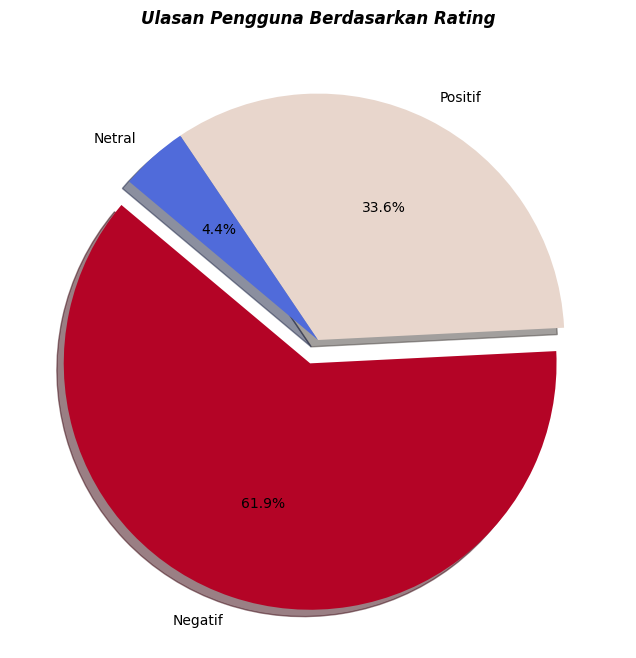

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

df = pd.read_csv('preprocess.csv')

sentiment_counts = df['sentimen'].value_counts()

colors = plt.get_cmap('coolwarm')(mcolors.Normalize(vmin=0, vmax=sentiment_counts.max())(sentiment_counts))

explode = [0.1 if i == sentiment_counts.idxmax() else 0 for i in sentiment_counts.index]

plt.figure(figsize=(10, 8))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True
)

plt.title('Ulasan Pengguna Berdasarkan Rating', fontsize=12, fontweight='bold', fontstyle='italic')
plt.show()

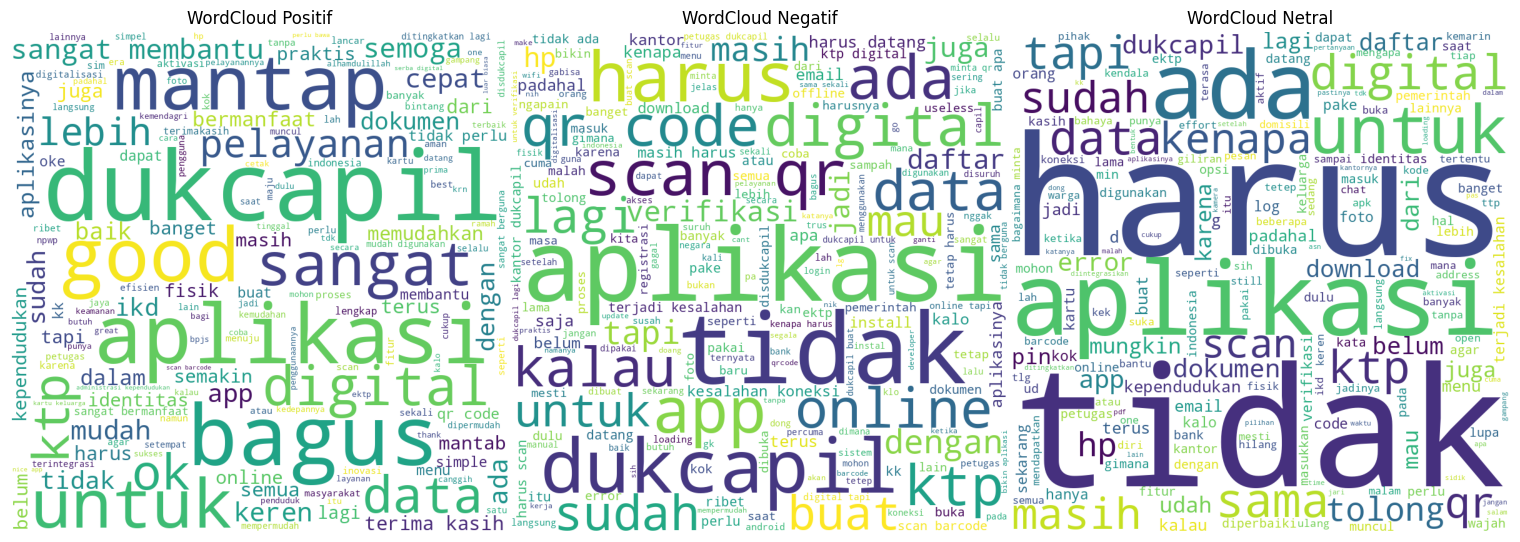

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('preprocess.csv')

custom_stopwords = ["di","dan","ini","saya", "bisa", "yang", "nya", "ke", "aja", "ya", "mulu", "ga"]
stopwords = STOPWORDS.union(set(custom_stopwords))


# Extract positive, negative, and neutral reviews (assuming a 'sentimen' column)
positive_text = " ".join(df[df['sentimen'] == 'Positif']['ulasan_bersih'].astype(str))
negative_text = " ".join(df[df['sentimen'] == 'Negatif']['ulasan_bersih'].astype(str))
neutral_text = " ".join(df[df['sentimen'] == 'Netral']['ulasan_bersih'].astype(str))


# Creating WordClouds
wordcloud_positif = WordCloud(width=800, height=800,
                             background_color='white',
                             stopwords=stopwords,
                             min_font_size=10).generate(positive_text)

wordcloud_negatif = WordCloud(width=800, height=800,
                             background_color='white',
                             stopwords=stopwords,
                             min_font_size=10).generate(negative_text)

wordcloud_netral = WordCloud(width=800, height=800,
                            background_color='white',
                            stopwords=stopwords,
                            min_font_size=10).generate(neutral_text)

# Menampilkan WordClouds
plt.figure(figsize=(15, 8))

# Positif
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positif)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("WordCloud Positif", fontsize=12)

# Negatif
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negatif)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("WordCloud Negatif", fontsize=12)

# Netral (New)
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_netral)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("WordCloud Netral", fontsize=12)

plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


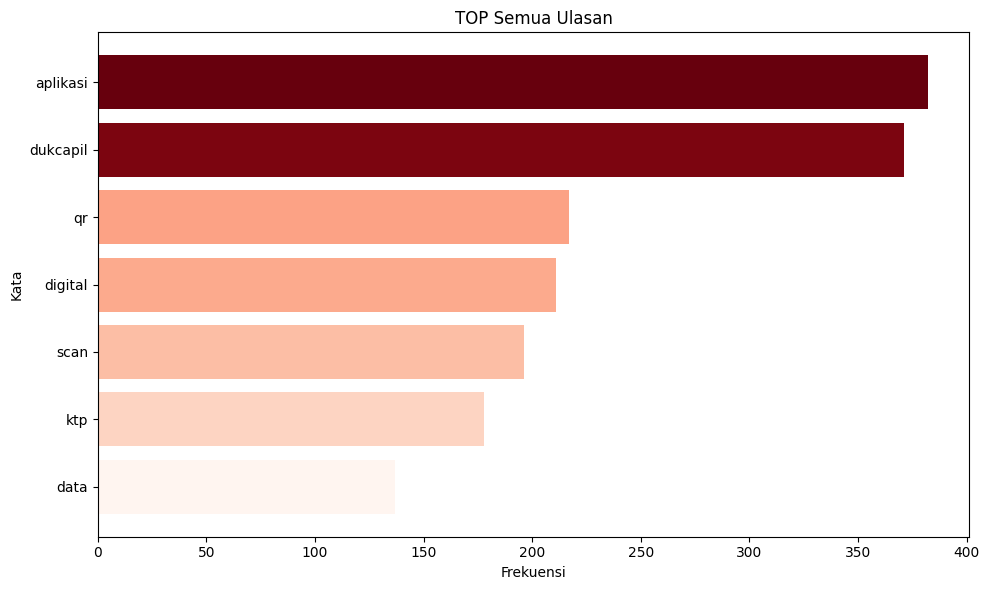

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords as nltk_stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import string
import numpy as np
import nltk

nltk.download('punkt')
nltk.download('stopwords')

all_text = ' '.join(df['ulasan_bersih'])

# Daftar stopwords
custom_stopwords = {"di","dan","ini","ga", "yg", "saya", "kalo", "aja", "yang", "nya", "gak", "ya", "mulu", "gk", "the", "to"}
stopwords = set(nltk_stopwords.words('indonesian')).union(custom_stopwords)

# Tokenisasi dan hitung frekuensi kata
word_tokens = word_tokenize(all_text.lower())
filtered_words = [w for w in word_tokens if w not in stopwords and w.isalnum()]
word_freq = Counter(filtered_words)

# Ambil kata teratas
top_words = word_freq.most_common(7)

# Buat DataFrame untuk visualisasi
df_words = pd.DataFrame(top_words, columns=['Kata', 'Frekuensi']).sort_values(by='Frekuensi', ascending=True)

# Normalisasi warna berdasarkan frekuensi
norm = plt.Normalize(df_words['Frekuensi'].min(), df_words['Frekuensi'].max())
colors = plt.cm.Reds(norm(df_words['Frekuensi']))

# Buat grafik batang horizontal
plt.figure(figsize=(10, 6))
plt.barh(df_words['Kata'], df_words['Frekuensi'], color=colors)
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('TOP Semua Ulasan')
plt.tight_layout()
plt.show()

**Kesimpulan :**



1. Puncak ulasan terbanyak adalah September dengan 10.7% dengan Rating 1.
2. Pada Januari, Maret, Juni memiliki ulasan kecil tetapi mendapatkan rating lebih bagus yaitu sekitar 4.9%, 5.9% dan 6.8% dengan rating 5.
3. Stabilitas diantara bulan Maret dan Desember memiliki jumlah ulasan 9.8% dengan rating 1.
4.   Penurunan Rating pada periode di mana rating turun mendekati 1, menunjukkan penurunan kepuasan atau performa pada waktu-waktu tertentu.
5.   Rata-rata rating yang berikan pada tahun 2023 adalah 1.
6.   Dari ulasan rating pengguna yang diberikan aplikasi mengindikasikan kearah Negatif dengan sentimen 61.9%.
7.  Terdapat isu-isu terkait Aplikasi, Disdukcapil, QR, Digital, Scan, KTP, kemudian Data.


**Solusi :**

1. **Peningkatan Kualitas Aplikasi:**
   - Audit fitur QR, scan, dan input data perbaiki bug dan tingkatkan kinerja.
   - Lakukan pengujian rutin untuk memastikan stabilitas aplikasi.
   - Desain UI/UX agar lebih intuitif.

2. **Penguatan Integrasi Sistem:**
   - Tingkatkan koordinasi dengan Disdukcapil untuk memastikan data akurat.
   - Standarkan format data sesuai aturan.

3. **Pengelolaan Ulasan Pengguna:**
   - Pantau ulasan pengguna dan tanggapi keluhan dengan cepat.

4. **Peningkatan Keamanan Data:**
   - Terapkan enkripsi untuk melindungi data pengguna.
   - Perbarui sistem keamanan secara berkala.

5. **Sosialisasi dan Edukasi:**
   - Buat panduan pengguna yang mudah dipahami.
   - Sosialisasikan fitur baru secara rutin.





